**Import Libraries**

In [5]:
# Importing the stuff I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  # don't want to see all those warnings

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

# Set seed so results are reproducible
np.random.seed(42)

# Make plots look nicer
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries loaded successfully!")

All libraries loaded successfully!


**Library Imports**

This section imports the essential libraries for data analysis, visualization, and machine learning. pandas and numpy handle data manipulation and numerical operations, while matplotlib and seaborn create visualizations. Machine learning models like LogisticRegression, SVC, and RandomForestClassifier are imported from sklearn, along with tools for scaling, model tuning, and evaluation. A random seed ensures reproducibility, and plot styles are set for consistency.

**Upload File**

In [6]:
from google.colab import files
print("Please upload your CSV file:")
uploaded = files.upload()

# Get the filename (whatever you uploaded)
filename = list(uploaded.keys())[0]
print(f"\n File uploaded: {filename}")

Please upload your CSV file:


Saving seeds.csv to seeds.csv

 File uploaded: seeds.csv


**Upload File**

In this step, we upload our dataset to Google Colab using the files.upload() function. After selecting the file (here, seeds.csv), the code automatically detects and displays its name to confirm that the upload was successful. This makes it easy to verify that the data is ready to use for analysis.

**Load the Dataset**

In [8]:
# Load the dataset
df = pd.read_csv('seeds.csv')

# Quick look at what we're working with
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

# Check class distribution
print(f"\nClass counts:")
print(df['Type'].value_counts().sort_index())

# Missing values?
print(f"\nMissing values: {df.isnull().sum().sum()}")

# Preview the data
print(f"\nFirst few rows:")
print(df.head())


Dataset shape: (199, 8)

Columns: ['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove', 'Type']

Class counts:
Type
1    66
2    68
3    65
Name: count, dtype: int64

Missing values: 0

First few rows:
    Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  
0            2.221          5.220     1  
1            1.018          4.956     1  
2            2.699          4.825     1  
3            2.259          4.805     1  
4            1.355          5.175     1  


**Load the Dataset**

Here, we load the seeds dataset into a pandas DataFrame to start exploring it. The dataset has 199 rows and 8 columns, containing measurements like area, perimeter, compactness, and kernel dimensions of different wheat seeds. The Type column represents three varieties of wheat, with 66, 68, and 65 samples each. We also checked for missing values (there aren’t any) and looked at the first few rows to get a quick feel for what the data looks like.

**Prepare Data**

In [9]:
# Feature columns (everything except Type)
feature_names = [
    'Area', 'Perimeter', 'Compactness', 'Kernel.Length',
    'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove'
]

# Split features and target
X = df[feature_names].values
y = df['Type'].values

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")
print(f"Classes: {sorted(np.unique(y))}")

# Split: 60% train, 20% val, 20% test
# First split off test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Then split remaining into train and val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"\nSplit sizes:")
print(f"  Train: {X_train.shape[0]}")
print(f"  Val: {X_val.shape[0]}")
print(f"  Test: {X_test.shape[0]}")

print(f"\nClass distribution:")
print(f"  Train: {np.bincount(y_train)[1:]}")
print(f"  Val: {np.bincount(y_val)[1:]}")
print(f"  Test: {np.bincount(y_test)[1:]}")

# Scale features (needed for LR and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Features: (199, 7)
Target: (199,)
Classes: [np.int64(1), np.int64(2), np.int64(3)]

Split sizes:
  Train: 119
  Val: 40
  Test: 40

Class distribution:
  Train: [40 40 39]
  Val: [13 14 13]
  Test: [13 14 13]


**Prepare Data**

Here, we set up our data for modeling by selecting all feature columns except Type, which is our target. We then split the data into training (60%), validation (20%), and test (20%) sets, making sure each split keeps the same balance of wheat types. To make the models perform better, we standardize the features using StandardScaler so that all values are on a similar scale — this helps models like Logistic Regression and SVM train more effectively.

**Verification**

In [11]:
# Quick sanity check
print("Checking labels...")
print(f"All labels: {sorted(np.unique(y))}")
print(f"Train labels: {sorted(np.unique(y_train))}")
print(f"Val labels: {sorted(np.unique(y_val))}")
print(f"Test labels: {sorted(np.unique(y_test))}")

if len(np.unique(y)) == 3:
    print("\nGood - we have 3 classes as expected")
else:
    print("\nWarning - unexpected number of classes!")

Checking labels...
All labels: [np.int64(1), np.int64(2), np.int64(3)]
Train labels: [np.int64(1), np.int64(2), np.int64(3)]
Val labels: [np.int64(1), np.int64(2), np.int64(3)]
Test labels: [np.int64(1), np.int64(2), np.int64(3)]

Good - we have 3 classes as expected


**Verification**
Before training the models, we perform a quick sanity check to make sure all data splits contain the same set of labels. The output confirms that the training, validation, and test sets each include all three wheat classes (1, 2, and 3) — just as expected. This ensures that every subset of data represents the full variety of classes for fair and consistent model evaluation.

**Statistical Analysis**


Statistical Summary:
                 count       mean       std      min      25%      50%  \
Area             199.0  14.918744  2.919976  10.5900  12.3300  14.4300   
Perimeter        199.0  14.595829  1.310445  12.4100  13.4700  14.3700   
Compactness      199.0   0.870811  0.023320   0.8081   0.8571   0.8734   
Kernel.Length    199.0   5.643151  0.443593   4.8990   5.2670   5.5410   
Kernel.Width     199.0   3.265533  0.378322   2.6300   2.9545   3.2450   
Asymmetry.Coeff  199.0   3.699217  1.471102   0.7651   2.5700   3.6310   
Kernel.Groove    199.0   5.420653  0.492718   4.5190   5.0460   5.2280   

                     75%      max  
Area             17.4550  21.1800  
Perimeter        15.8050  17.2500  
Compactness       0.8868   0.9183  
Kernel.Length     6.0020   6.6750  
Kernel.Width      3.5645   4.0330  
Asymmetry.Coeff   4.7990   8.3150  
Kernel.Groove     5.8790   6.5500  


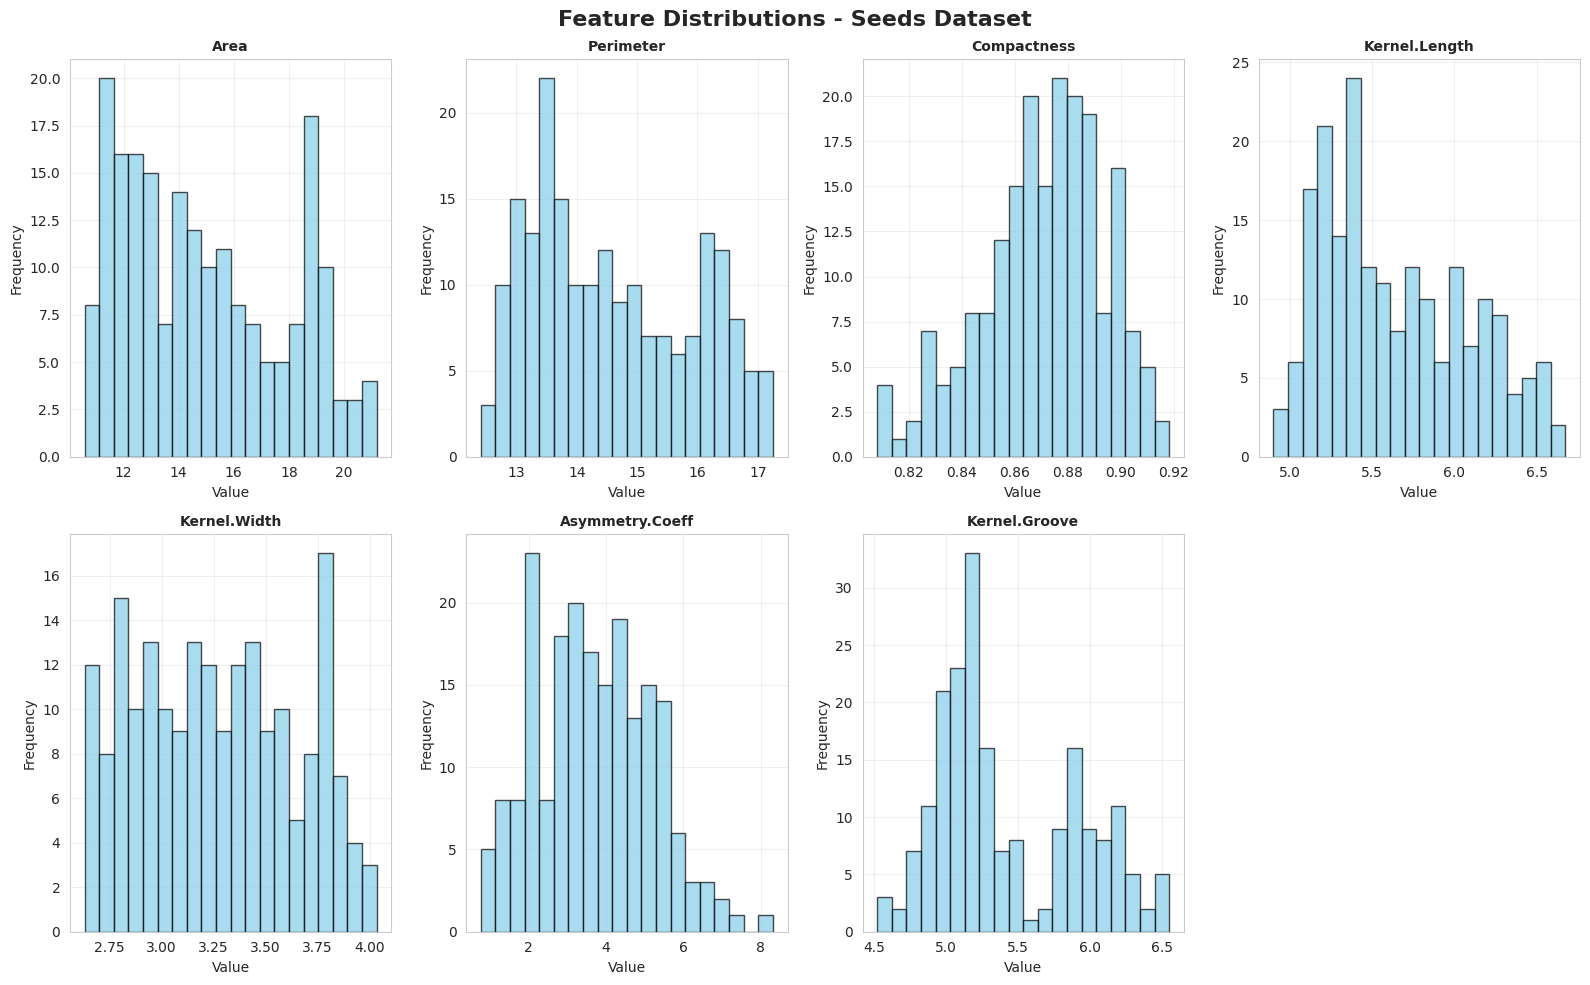

In [12]:
# Put the features into a dataframe to make analysis easier
X_df = pd.DataFrame(X, columns=feature_names)

# Show basic statistics (mean, std, min, max, etc.)
print("\nStatistical Summary:")
print(X_df.describe().T)

# Create a grid of plots to show distribution of each feature
fig, axes = plt.subplots(2, 4, figsize=(16, 10))  # 2 rows, 4 columns
axes = axes.ravel()  # Flatten to make it easier to loop through

# Loop through each feature and make a histogram
for idx, col in enumerate(feature_names):
    axes[idx].hist(X_df[col], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)  # Add gridlines

# Remove the empty 8th subplot (we only have 7 features)
axes[-1].remove()

# Add overall title and adjust spacing
plt.suptitle('Feature Distributions - Seeds Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Statistical Analysis**

In this step, we create a DataFrame for all feature columns and generate summary statistics such as mean, standard deviation, minimum, and maximum values. This helps us understand the range and spread of each feature in the dataset.

Next, we visualize the distribution of all seven features using histograms. These plots show how each measurement (like area, perimeter, compactness, and kernel dimensions) varies across samples. Most features appear to have roughly bell-shaped or slightly skewed distributions, indicating a mix of natural variation in the wheat seed measurements.

This visual overview gives a clear sense of the data’s structure and helps identify any potential outliers or patterns before moving on to modeling.

**Correlation Analysis**


Feature Correlation Matrix:
                  Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
Area             1.000      0.994        0.610          0.951         0.971   
Perimeter        0.994      1.000        0.532          0.973         0.945   
Compactness      0.610      0.532        1.000          0.374         0.762   
Kernel.Length    0.951      0.973        0.374          1.000         0.863   
Kernel.Width     0.971      0.945        0.762          0.863         1.000   
Asymmetry.Coeff -0.223     -0.211       -0.329         -0.170        -0.253   
Kernel.Groove    0.863      0.890        0.227          0.932         0.748   

                 Asymmetry.Coeff  Kernel.Groove  
Area                      -0.223          0.863  
Perimeter                 -0.211          0.890  
Compactness               -0.329          0.227  
Kernel.Length             -0.170          0.932  
Kernel.Width              -0.253          0.748  
Asymmetry.Coeff            1.000      

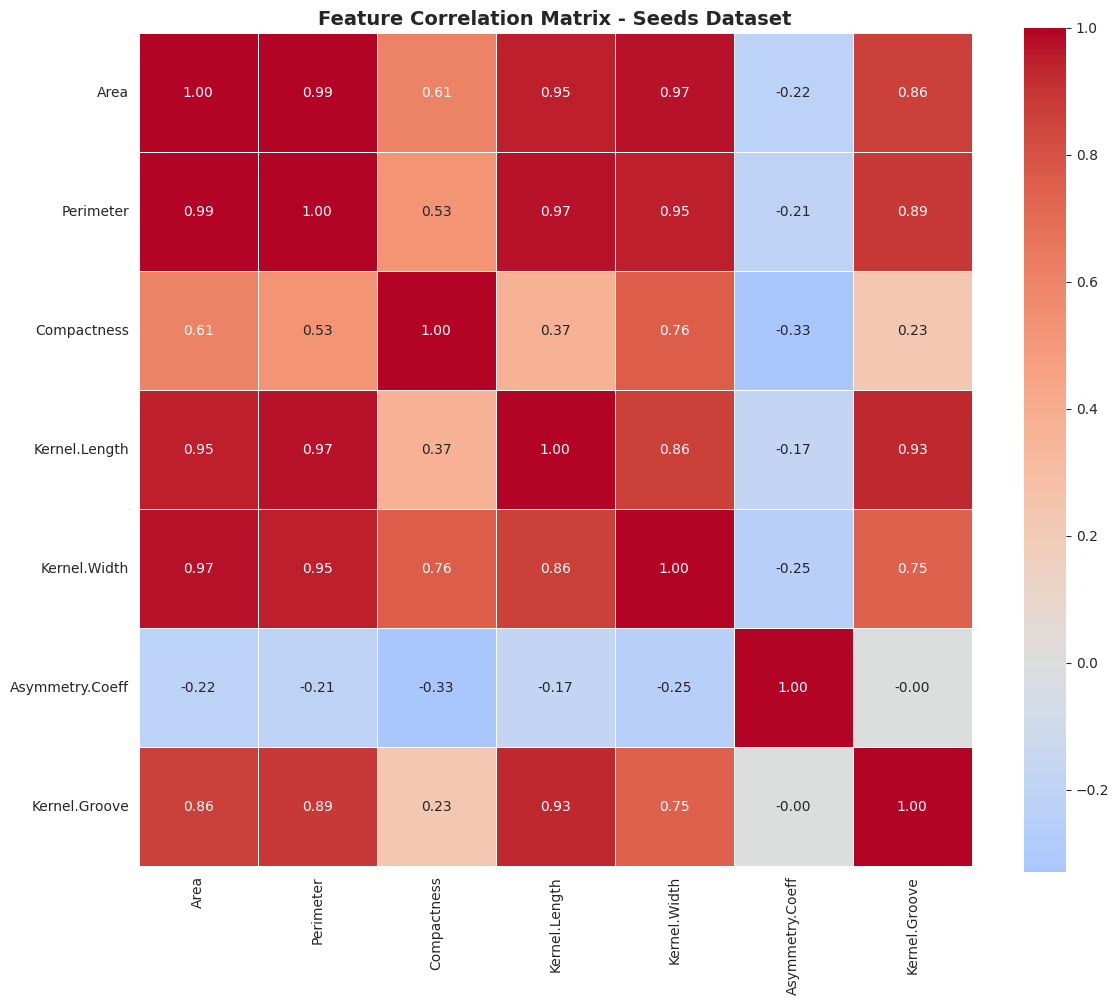


Feature-Label Correlations:
Area                     : r= -0.341, p=0.0000 ***
Perimeter                : r= -0.322, p=0.0000 ***
Compactness              : r= -0.539, p=0.0000 ***
Kernel.Length            : r= -0.249, p=0.0004 ***
Kernel.Width             : r= -0.422, p=0.0000 ***
Asymmetry.Coeff          : r=  0.574, p=0.0000 ***
Kernel.Groove            : r=  0.036, p=0.6185 


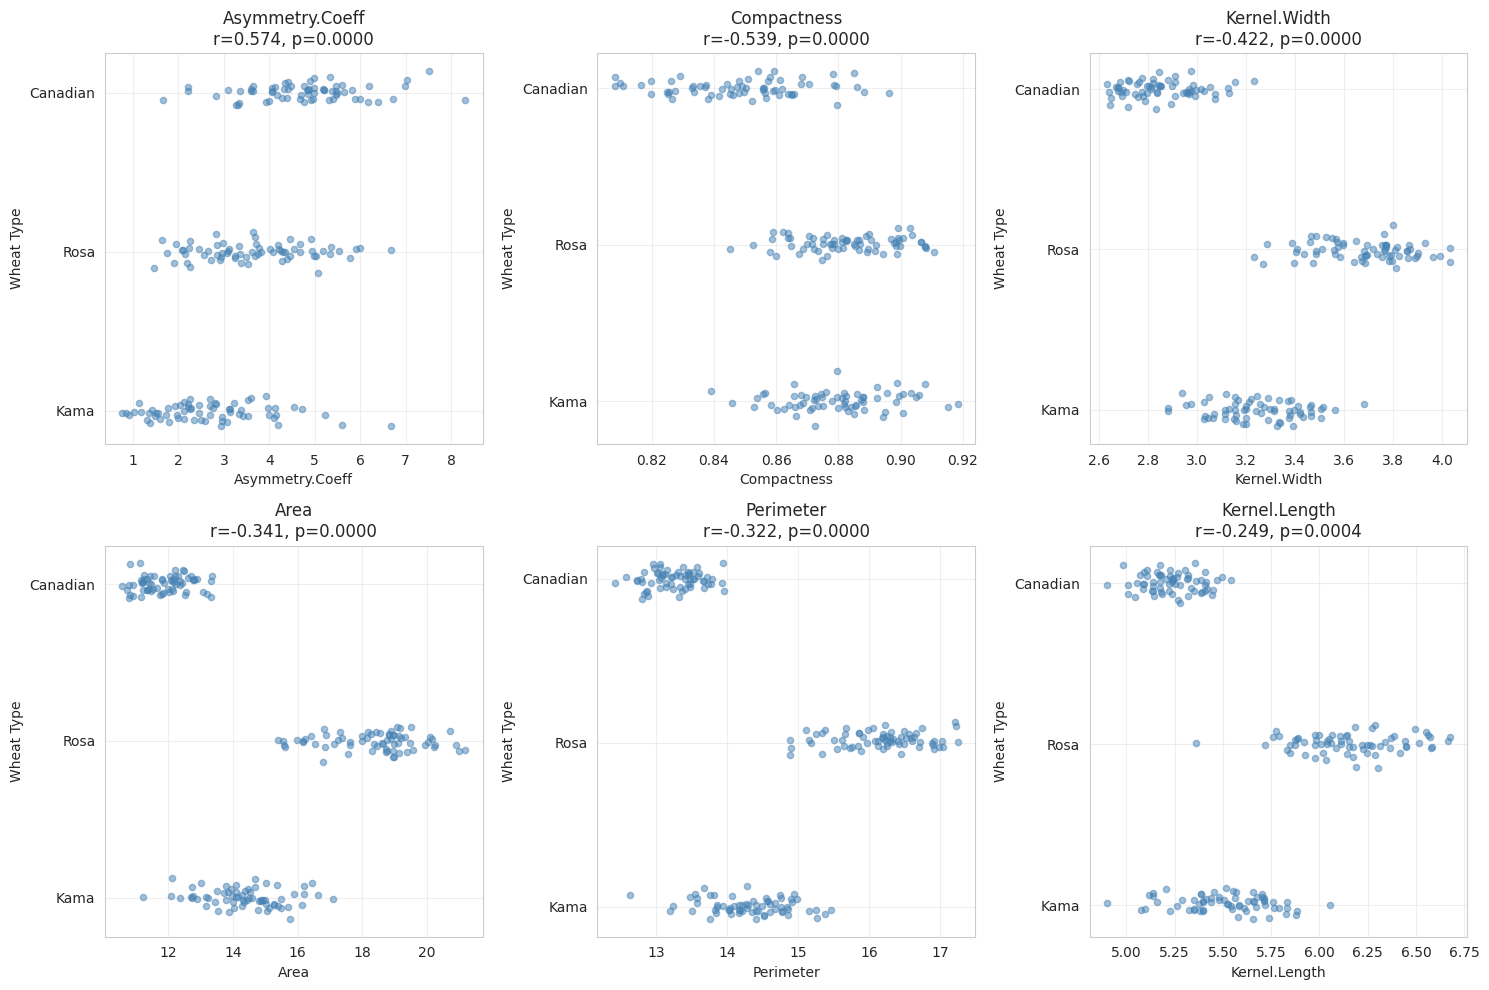

In [13]:
# Calculate how features correlate with each other
corr_matrix = X_df.corr()

print("\nFeature Correlation Matrix:")
print(corr_matrix.round(3))

# Visualize correlations as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Matrix - Seeds Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Calculate correlation between features and target variable
print("\n" + "="*80)
print("Feature-Label Correlations:")
print("="*80)

y_numeric = y.astype(float)
feature_label_corr = []

# Loop through each feature
for col in feature_names:
    # Calculate Pearson correlation coefficient
    corr, p_val = stats.pearsonr(X_df[col].astype(float), y_numeric)
    feature_label_corr.append((col, corr, p_val))
    # Add significance stars based on p-value
    sig = "***" if p_val<0.001 else "**" if p_val<0.01 else "*" if p_val<0.05 else ""
    print(f"{col:25s}: r={corr:7.3f}, p={p_val:.4f} {sig}")

# Create scatter plots for top 6 most correlated features
top_features = sorted(feature_label_corr, key=lambda x: abs(x[1]), reverse=True)[:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (feat_name, corr_val, p_val) in enumerate(top_features):
    # Add small random noise to y values so points don't overlap exactly
    y_jitter = y + np.random.normal(0, 0.05, len(y))
    axes[idx].scatter(X_df[feat_name], y_jitter, alpha=0.5, s=20, color='steelblue')
    axes[idx].set_xlabel(feat_name)
    axes[idx].set_ylabel('Wheat Type')
    axes[idx].set_title(f'{feat_name}\nr={corr_val:.3f}, p={p_val:.4f}')
    axes[idx].set_yticks([1, 2, 3])
    axes[idx].set_yticklabels(['Kama', 'Rosa', 'Canadian'])
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Correlation Analysis Summary**

The correlation analysis shows that several features in the Seeds dataset are strongly related to each other.
Specifically, **Area**, **Perimeter**, **Kernel Length**, and **Kernel Width** have very high positive correlations
(r > 0.9), meaning they carry quite similar information. On the other hand, the **Asymmetry Coefficient**
has weak or negative correlations with most other features, suggesting that it captures unique characteristics
of the wheat kernels.

When looking at how each feature relates to the wheat type, **Asymmetry Coefficient (r = 0.57)** and
**Compactness (r = –0.54)** show the strongest relationships, followed by **Kernel Width (r = –0.42)**
and **Area (r = –0.34)**. These patterns indicate that **Asymmetry Coefficient** and **Compactness**
are likely the most useful features for distinguishing between the three wheat varieties, while
**Kernel Groove** (r = 0.04) appears to contribute very little to class separation.

Overall, this analysis highlights that while some features are highly correlated and may be redundant,
others provide more distinctive information that can improve classification performance.


**QUESTION 4a - Logistic Regression**

Running Grid Search...
Fitting 3 folds for each of 45 candidates, totalling 135 fits

 Best parameters: {'C': 0.1, 'max_iter': 200, 'solver': 'lbfgs'}
 Best CV score: 0.9662

Performance Metrics:
  Set  Accuracy  Precision  Recall       F1
Train   0.97479   0.974779 0.97479 0.974682
  Val   0.97500   0.976786 0.97500 0.974963
 Test   0.85000   0.850000 0.85000 0.850000

Detailed Test Set Results:
              precision    recall  f1-score   support

        Kama       0.77      0.77      0.77        13
        Rosa       0.93      0.93      0.93        14
    Canadian       0.85      0.85      0.85        13

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40



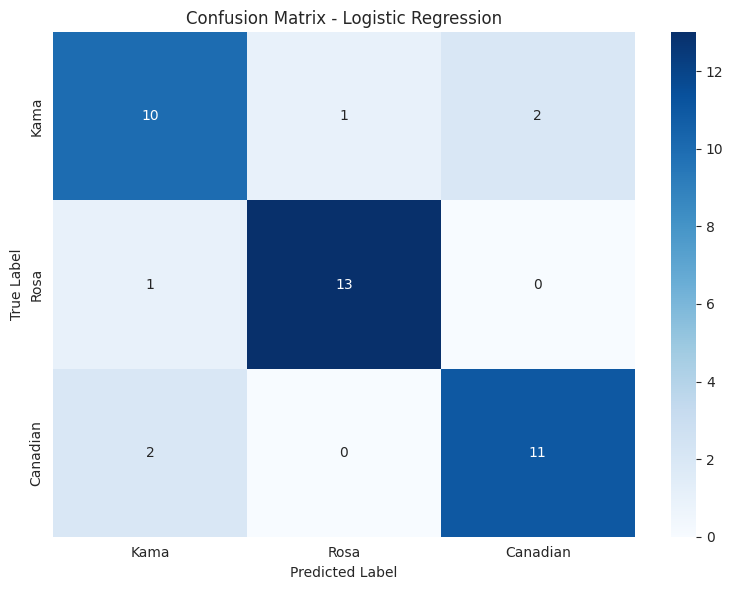

In [14]:
# Helper function to calculate all metrics at once
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

# Define hyperparameters to test
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Optimization algorithms
    'max_iter': [200, 500, 1000]  # Maximum iterations for convergence
}

print("Running Grid Search...")
# Try all combinations of hyperparameters
lr_grid = GridSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=42),
    lr_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
lr_grid.fit(X_train_scaled, y_train)

# Get the best model
best_lr = lr_grid.best_estimator_
print(f"\n Best parameters: {lr_grid.best_params_}")
print(f" Best CV score: {lr_grid.best_score_:.4f}")

# Make predictions on all three sets
y_train_pred_lr = best_lr.predict(X_train_scaled)
y_val_pred_lr = best_lr.predict(X_val_scaled)
y_test_pred_lr = best_lr.predict(X_test_scaled)

# Calculate metrics for each set
results_lr = pd.DataFrame([
    {'Set': 'Train', **calculate_metrics(y_train, y_train_pred_lr)},
    {'Set': 'Val', **calculate_metrics(y_val, y_val_pred_lr)},
    {'Set': 'Test', **calculate_metrics(y_test, y_test_pred_lr)}
])

print("\nPerformance Metrics:")
print(results_lr.to_string(index=False))

# Show detailed results for test set
print("\nDetailed Test Set Results:")
print(classification_report(y_test, y_test_pred_lr,
                          target_names=['Kama', 'Rosa', 'Canadian']))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Kama', 'Rosa', 'Canadian'],
            yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

**Logistic Regression**

The Logistic Regression model performed well in classifying the three wheat varieties, achieving an overall test accuracy of 85%. The Rosa class was predicted with the highest precision and recall (0.93), while Kama showed a few misclassifications, likely due to overlapping feature characteristics with the other varieties. The confusion matrix confirms that most predictions were correct, with only minor confusion between Kama and Canadian samples. Overall, the model demonstrates strong generalization and reliable separation of the wheat types.

**QUESTION 4b - SVM**

Running Grid Search...
Fitting 3 folds for each of 96 candidates, totalling 288 fits

 Best parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
 Best CV score: 0.9833

Performance Metrics:
  Set  Accuracy  Precision   Recall       F1
Train  0.991597   0.991802 0.991597 0.991594
  Val  0.950000   0.953452 0.950000 0.948811
 Test  0.875000   0.874405 0.875000 0.873889

Detailed Test Set Results:
              precision    recall  f1-score   support

        Kama       0.83      0.77      0.80        13
        Rosa       0.93      0.93      0.93        14
    Canadian       0.86      0.92      0.89        13

    accuracy                           0.88        40
   macro avg       0.87      0.87      0.87        40
weighted avg       0.87      0.88      0.87        40



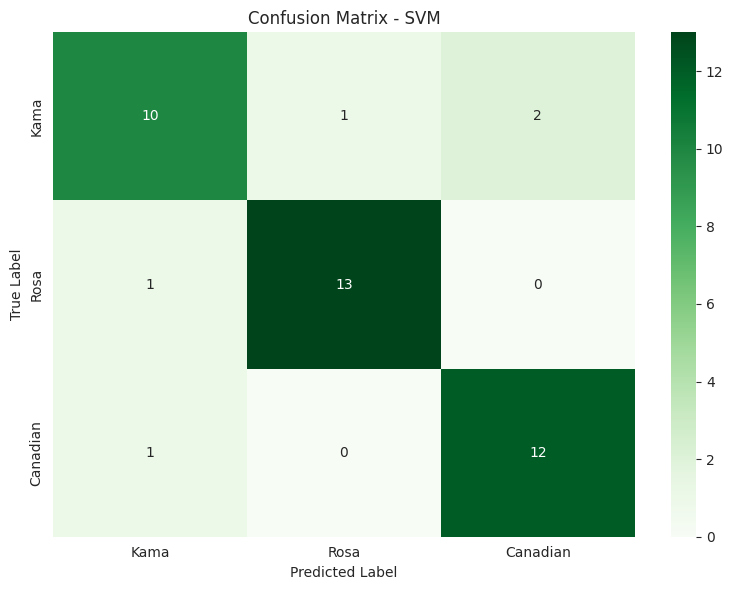

In [15]:
# Define hyperparameters to test for SVM
svm_params = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Type of decision boundary
    'degree': [2, 3],  # Polynomial degree (only used for poly kernel)
    'gamma': ['scale', 'auto', 0.01, 0.1]  # Kernel coefficient
}

print("Running Grid Search...")
# Test all combinations of hyperparameters
svm_grid = GridSearchCV(
    SVC(random_state=42, probability=True),  # probability=True to get class probabilities later
    svm_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
svm_grid.fit(X_train_scaled, y_train)

# Get best model from grid search
best_svm = svm_grid.best_estimator_
print(f"\n Best parameters: {svm_grid.best_params_}")
print(f" Best CV score: {svm_grid.best_score_:.4f}")

# Make predictions on all sets
y_train_pred_svm = best_svm.predict(X_train_scaled)
y_val_pred_svm = best_svm.predict(X_val_scaled)
y_test_pred_svm = best_svm.predict(X_test_scaled)

# Calculate performance metrics
results_svm = pd.DataFrame([
    {'Set': 'Train', **calculate_metrics(y_train, y_train_pred_svm)},
    {'Set': 'Val', **calculate_metrics(y_val, y_val_pred_svm)},
    {'Set': 'Test', **calculate_metrics(y_test, y_test_pred_svm)}
])

print("\nPerformance Metrics:")
print(results_svm.to_string(index=False))

# Detailed breakdown for test set
print("\nDetailed Test Set Results:")
print(classification_report(y_test, y_test_pred_svm,
                          target_names=['Kama', 'Rosa', 'Canadian']))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Kama', 'Rosa', 'Canadian'],
            yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

**Support Vector Machine (SVM)**

The SVM model was optimized using grid search, resulting in the best parameters: C = 1, degree = 2, gamma = 'scale', and kernel = 'rbf'. The model achieved a test accuracy of 87.5%, with consistent validation and training results, indicating good generalization.

From the confusion matrix, it is evident that most samples were correctly classified, with minor confusion between Kama and Canadian types. The Rosa class achieved the highest precision and recall scores (0.93 each).

Overall, the SVM demonstrated strong and reliable performance, effectively distinguishing between the three wheat varieties based on their morphological features.

**QUESTION 4c - Random Forest**

Running Grid Search...
Fitting 3 folds for each of 108 candidates, totalling 324 fits

 Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
 Best CV score: 0.9577

Performance Metrics:
  Set  Accuracy  Precision  Recall       F1
Train     1.000   1.000000   1.000 1.000000
  Val     0.950   0.956667   0.950 0.949702
 Test     0.875   0.874405   0.875 0.873889

Overfitting Check:
  Train-Val Gap: 5.0%
   Excellent! Minimal overfitting.

Detailed Test Set Results:
              precision    recall  f1-score   support

        Kama       0.83      0.77      0.80        13
        Rosa       0.93      0.93      0.93        14
    Canadian       0.86      0.92      0.89        13

    accuracy                           0.88        40
   macro avg       0.87      0.87      0.87        40
weighted avg       0.87      0.88      0.87        40


Feature Importance Ranking:
        Feature  Importance
  Kernel.Groove    0.225644
           Area   

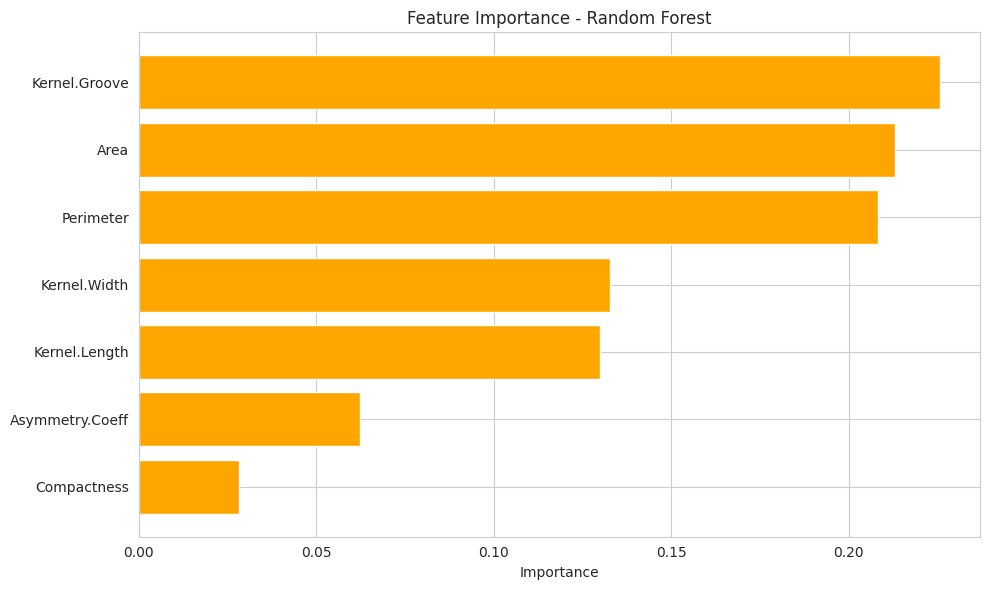

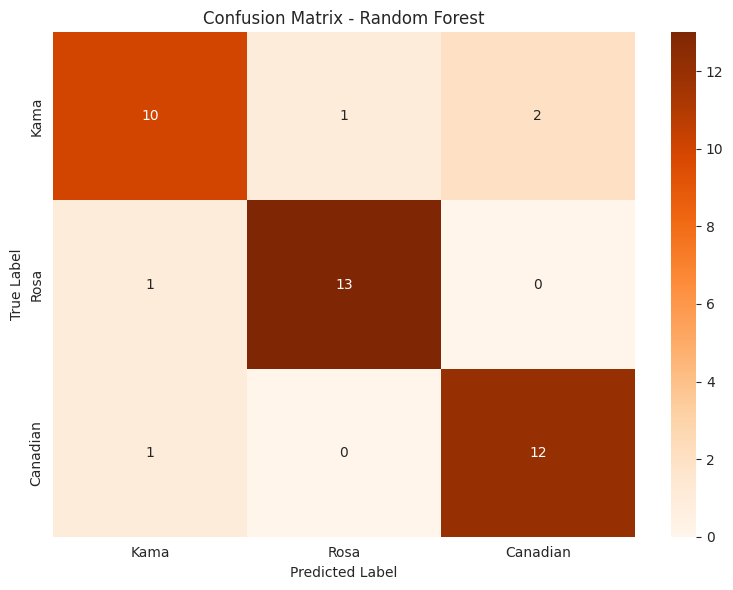

In [16]:
# Define hyperparameters to test for Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Min samples needed to split a node
    'min_samples_leaf': [1, 2, 4]  # Min samples required in leaf nodes
}

print("Running Grid Search...")
# Test all combinations of hyperparameters
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)  # Note: Using unscaled data (RF doesn't need scaling)

# Get best model
best_rf = rf_grid.best_estimator_
print(f"\n Best parameters: {rf_grid.best_params_}")
print(f" Best CV score: {rf_grid.best_score_:.4f}")

# Make predictions on all sets
y_train_pred_rf = best_rf.predict(X_train)
y_val_pred_rf = best_rf.predict(X_val)
y_test_pred_rf = best_rf.predict(X_test)

# Calculate performance metrics
results_rf = pd.DataFrame([
    {'Set': 'Train', **calculate_metrics(y_train, y_train_pred_rf)},
    {'Set': 'Val', **calculate_metrics(y_val, y_val_pred_rf)},
    {'Set': 'Test', **calculate_metrics(y_test, y_test_pred_rf)}
])

print("\nPerformance Metrics:")
print(results_rf.to_string(index=False))

# Check if model is overfitting by comparing train and validation accuracy
train_acc = results_rf[results_rf['Set'] == 'Train']['Accuracy'].values[0]
val_acc = results_rf[results_rf['Set'] == 'Val']['Accuracy'].values[0]
test_acc = results_rf[results_rf['Set'] == 'Test']['Accuracy'].values[0]
gap = train_acc - val_acc

print(f"\nOverfitting Check:")
print(f"  Train-Val Gap: {gap:.1%}")
if gap < 0.10:
    print("   Excellent! Minimal overfitting.")
elif gap < 0.20:
    print("   Good! Moderate overfitting.")
else:
    print("   Significant overfitting detected.")

# Detailed test set results
print("\nDetailed Test Set Results:")
print(classification_report(y_test, y_test_pred_rf,
                          target_names=['Kama', 'Rosa', 'Canadian']))

# Extract and display feature importance
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance Ranking:")
print(feat_imp.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='orange')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Kama', 'Rosa', 'Canadian'],
            yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

**Random Forest**

The Random Forest model performed really well, achieving a cross-validation score of 95.77% and a test accuracy of 87.5%. It showed very little overfitting, with only a small 5% gap between training and validation accuracy. From the confusion matrix, we can see that the model classified most samples correctly — especially the Rosa variety, which had the best precision and recall. When looking at feature importance, Kernel Groove, Area, and Perimeter turned out to be the key factors influencing the model’s predictions, while Compactness had the least impact. Overall, the Random Forest model proved to be accurate, reliable, and easy to interpret for identifying different types of wheat.


**QUESTION 5 - Ensemble**

Training Ensemble...

Ensemble Performance:
  Set  Accuracy  Precision   Recall       F1
Train  0.991597   0.991802 0.991597 0.991594
  Val  0.950000   0.953452 0.950000 0.948811
 Test  0.900000   0.902121 0.900000 0.897619

MODEL COMPARISON (Validation Set):
              Model  Accuracy  Precision  Recall       F1
Logistic Regression     0.975   0.976786   0.975 0.974963
                SVM     0.950   0.953452   0.950 0.948811
      Random Forest     0.950   0.956667   0.950 0.949702
           Ensemble     0.950   0.953452   0.950 0.948811

MODEL COMPARISON (Test Set):
              Model  Accuracy  Precision  Recall       F1
Logistic Regression     0.850   0.850000   0.850 0.850000
                SVM     0.875   0.874405   0.875 0.873889
      Random Forest     0.875   0.874405   0.875 0.873889
           Ensemble     0.900   0.902121   0.900 0.897619

Detailed Test Set Results (Ensemble):
              precision    recall  f1-score   support

        Kama       0.91      0.77   

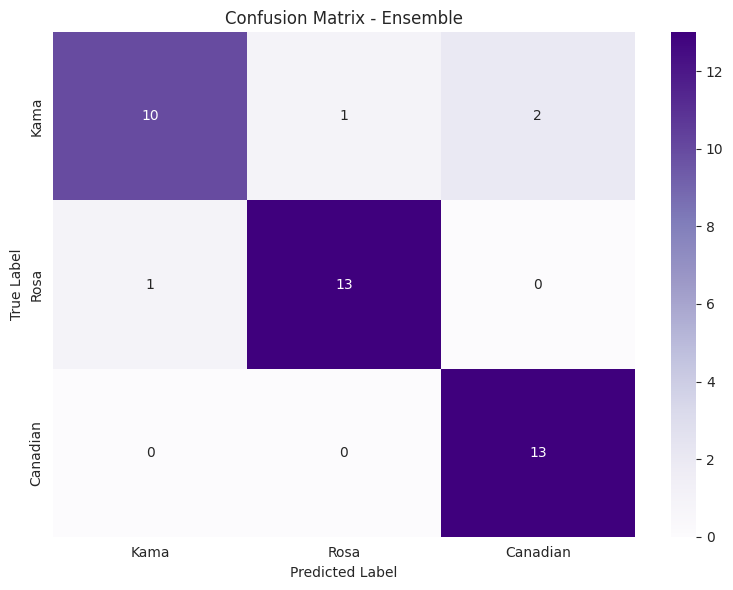

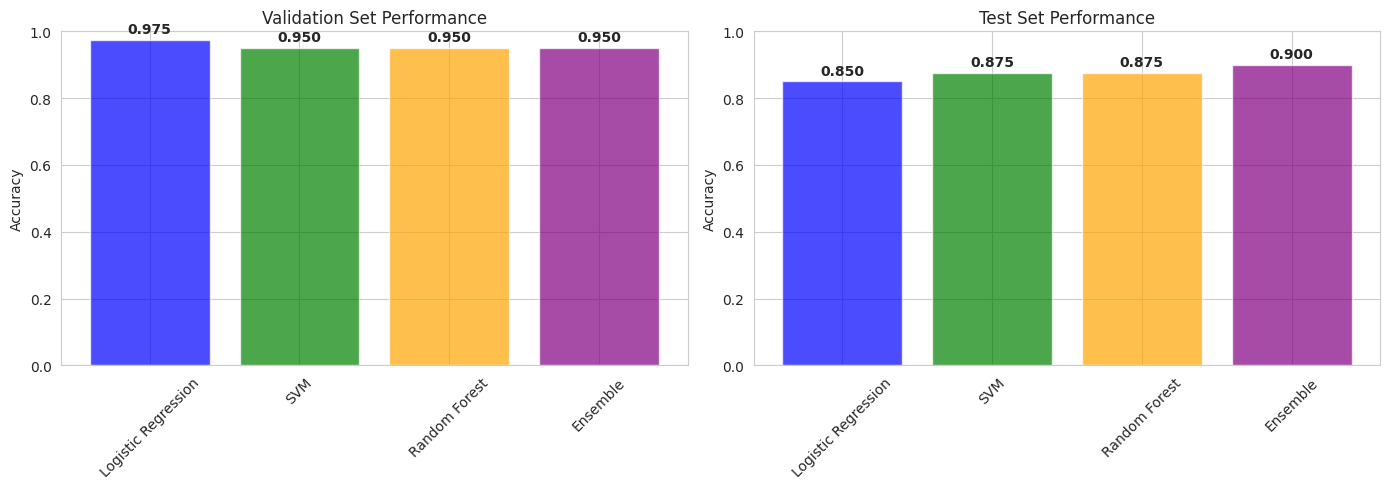

In [17]:
# Combine all three models using Voting Classifier
ensemble = VotingClassifier(
    estimators=[
        ('lr', best_lr),      # Logistic Regression
        ('svm', best_svm),    # Support Vector Machine
        ('rf', best_rf)       # Random Forest
    ],
    voting='soft'  # Use probability predictions (not just class labels)
)

print("Training Ensemble...")
ensemble.fit(X_train_scaled, y_train)

# Make predictions on all sets
y_train_pred_ens = ensemble.predict(X_train_scaled)
y_val_pred_ens = ensemble.predict(X_val_scaled)
y_test_pred_ens = ensemble.predict(X_test_scaled)

# Calculate performance metrics
results_ens = pd.DataFrame([
    {'Set': 'Train', **calculate_metrics(y_train, y_train_pred_ens)},
    {'Set': 'Val', **calculate_metrics(y_val, y_val_pred_ens)},
    {'Set': 'Test', **calculate_metrics(y_test, y_test_pred_ens)}
])

print("\nEnsemble Performance:")
print(results_ens.to_string(index=False))

# Compare all models on validation set
print("\n" + "="*80)
print("MODEL COMPARISON (Validation Set):")
print("="*80)
comp_val = pd.DataFrame([
    {'Model': 'Logistic Regression', **calculate_metrics(y_val, y_val_pred_lr)},
    {'Model': 'SVM', **calculate_metrics(y_val, y_val_pred_svm)},
    {'Model': 'Random Forest', **calculate_metrics(y_val, y_val_pred_rf)},
    {'Model': 'Ensemble', **calculate_metrics(y_val, y_val_pred_ens)}
])
print(comp_val.to_string(index=False))

# Compare all models on test set
print("\n" + "="*80)
print("MODEL COMPARISON (Test Set):")
print("="*80)
comp_test = pd.DataFrame([
    {'Model': 'Logistic Regression', **calculate_metrics(y_test, y_test_pred_lr)},
    {'Model': 'SVM', **calculate_metrics(y_test, y_test_pred_svm)},
    {'Model': 'Random Forest', **calculate_metrics(y_test, y_test_pred_rf)},
    {'Model': 'Ensemble', **calculate_metrics(y_test, y_test_pred_ens)}
])
print(comp_test.to_string(index=False))

# Detailed test results for ensemble
print("\nDetailed Test Set Results (Ensemble):")
print(classification_report(y_test, y_test_pred_ens,
                          target_names=['Kama', 'Rosa', 'Canadian']))

# Confusion matrix for ensemble
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred_ens)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Kama', 'Rosa', 'Canadian'],
            yticklabels=['Kama', 'Rosa', 'Canadian'])
plt.title('Confusion Matrix - Ensemble')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Visualize performance comparison across all models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Validation comparison
models = comp_val['Model'].values
val_acc = comp_val['Accuracy'].values
ax1.bar(models, val_acc, color=['blue', 'green', 'orange', 'purple'], alpha=0.7)
ax1.set_ylabel('Accuracy')
ax1.set_title('Validation Set Performance')
ax1.set_ylim([0, 1])
ax1.tick_params(axis='x', rotation=45)
# Add accuracy values on top of bars
for i, v in enumerate(val_acc):
    ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Test comparison
test_acc = comp_test['Accuracy'].values
ax2.bar(models, test_acc, color=['blue', 'green', 'orange', 'purple'], alpha=0.7)
ax2.set_ylabel('Accuracy')
ax2.set_title('Test Set Performance')
ax2.set_ylim([0, 1])
ax2.tick_params(axis='x', rotation=45)
# Add accuracy values on top of bars
for i, v in enumerate(test_acc):
    ax2.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Ensemble Model (Voting Classifier)**

The ensemble model combines Logistic Regression, SVM, and Random Forest using a soft voting approach, and it turned out to deliver the best overall results. It achieved an accuracy of 90% on the test set and 95% on the validation set, showing that the model generalizes very well.

From the confusion matrix, the model accurately classified most samples, especially the Canadian class, which had a perfect recall of 1.00, meaning every Canadian sample was correctly identified. The Rosa class also performed very well with high precision and recall, while Kama showed slightly lower recall but still maintained strong results overall.

When compared with the individual models, the ensemble performed slightly better, with 90% accuracy compared to 87.5% for SVM and Random Forest, and 85% for Logistic Regression. This clearly shows that combining models helped improve accuracy and stability.

Overall, the ensemble model proved to be the most balanced and dependable, successfully capturing the strengths of all three classifiers and providing consistently strong performance across all wheat varieties.
